# Clustering on speed dating dataset

Dataset taken from https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

All of the data transformations done in the next cells are taken from a previous exercise with this dataset: https://github.com/jcasarmiento/CrossValidation

In [2]:
df=pd.read_csv("speeddating.csv",header=0)
df=df.drop(["expected_num_interested_in_me","expected_num_matches","shared_interests_o","shared_interests_partner","ambitous_o","ambition_partner"],axis=1)
df=df.dropna(how="any")
to_drop=["has_null","wave","d_age","d_d_age","samerace","d_importance_same_race","d_importance_same_religion","d_pref_o_attractive","d_pref_o_sincere",\
        "d_pref_o_intelligence","d_pref_o_funny","d_pref_o_ambitious","d_pref_o_shared_interests","d_attractive_o","d_sinsere_o","d_intelligence_o",\
        "d_funny_o","d_ambitous_o","d_shared_interests_o","d_attractive_important","d_sincere_important","d_intellicence_important","d_funny_important",\
        "d_ambtition_important","d_shared_interests_important","d_attractive","d_sincere","d_intelligence","d_funny","d_ambition","d_attractive_partner",\
        "d_sincere_partner","d_intelligence_partner","d_funny_partner","d_ambition_partner","d_shared_interests_partner","d_sports","d_tvsports","d_exercise",\
        "d_dining","d_museums","d_art","d_hiking","d_gaming","d_clubbing","d_reading","d_tv","d_theater","d_movies","d_concerts","d_music","d_shopping","d_yoga",\
        "d_interests_correlate","expected_happy_with_sd_people","d_expected_num_interested_in_me","d_expected_num_matches","like","guess_prob_liked","d_like",\
        "d_guess_prob_liked","met","decision","decision_o"]
df=df.drop(to_drop,axis=1)
y = df.pop('match')  # labels correspond to column match
df = pd.get_dummies(df,drop_first=True)  #data is rest of columns and there is still categorical colums

In [3]:
y.shape,type(y),df.shape,type(df)

((7079,), pandas.core.series.Series, (7079, 313), pandas.core.frame.DataFrame)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(df)
X

array([[-1.51065932,  0.19618885, -0.62941637, ..., -0.04289285,
        -0.98890181, -0.61615995],
       [-1.51065932, -1.23913653, -0.62941637, ..., -0.04289285,
        -0.98890181, -0.61615995],
       [-1.51065932, -0.95207146, -0.62941637, ..., -0.04289285,
        -0.98890181, -0.61615995],
       ...,
       [-0.37112527, -0.66500638, -0.98247806, ..., -0.04289285,
        -0.98890181,  1.6229552 ],
       [-0.37112527, -1.23913653, -0.98247806, ..., -0.04289285,
        -0.98890181,  1.6229552 ],
       [-0.37112527, -1.23913653, -0.98247806, ..., -0.04289285,
        -0.98890181,  1.6229552 ]])

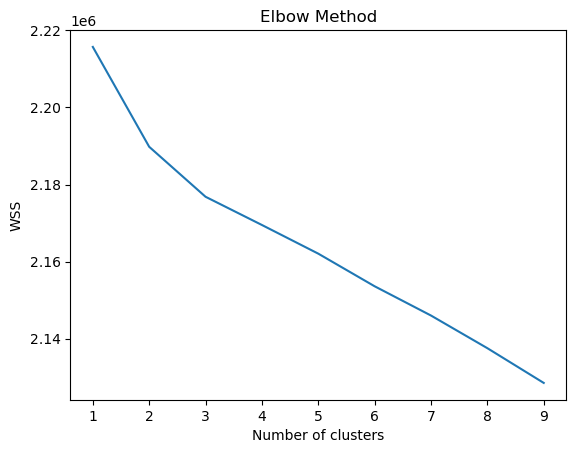

In [5]:
from sklearn.cluster import KMeans

WSS = []
for k in range(1,10,1):
    k_means=KMeans(n_clusters=k, random_state=0,n_init=10)
    k_means.fit(X)
    WSS.append(k_means.inertia_)

plt.plot(range(1,10,1), WSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

For K-means, optimal k is between 2 and 3

In [6]:
k_means=KMeans(n_clusters=2, random_state=0,n_init=10)
k_means.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [7]:
centroids=k_means.cluster_centers_
df_centroids=pd.DataFrame(centroids,columns=df.columns)
df_centroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 313 entries, age to d_expected_happy_with_sd_people_b'[7-10]'
dtypes: float64(313)
memory usage: 5.0 KB


In [8]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
y=pd.get_dummies(y,drop_first=True)
y.columns

Index(['b'1''], dtype='object')

In [10]:
y.rename(columns={"b'1'":"Match"},inplace=True)
y.columns

Index(['Match'], dtype='object')

In [11]:
from sklearn.metrics import confusion_matrix,silhouette_score

confusion_matrix(y,k_means.labels_),silhouette_score(X,k_means.labels_)

(array([[2967, 2878],
        [ 571,  663]], dtype=int64),
 0.017227805304637068)

Trying undersampling of dataset: also in the other notebook

In [12]:
ds_df=pd.concat([df,y],axis=1)
# Separate the two classes
df0=ds_df[ds_df["Match"]==0]
df1=ds_df[ds_df["Match"]==1]
df0=df0.sample(n=df1.shape[0],replace=False,random_state=0)   # take out a number of samples from the "bigger" class
ds=pd.concat([df0,df1],ignore_index=True)  #combine
ds=ds.sample(frac=1,random_state=0).reset_index(drop=True)   #shuffle the table, added random state so that it doesn´t change to compare later
yds = ds.pop('Match')  # labels correspond to column match

In [13]:
ds_df.head()

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,field_b'psychology',field_b'social work',field_b'sociology',field_b'speech pathology',field_b'teaching of English',field_b'theory',field_b'working',d_expected_happy_with_sd_people_b'[5-6]',d_expected_happy_with_sd_people_b'[7-10]',Match
0,21.0,27.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,22.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,21.0,23.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,1
4,21.0,24.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,0,0,0,0,0,0,0,0,0,1
5,21.0,25.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ds_df.shape,ds.shape

((7079, 314), (2468, 313))

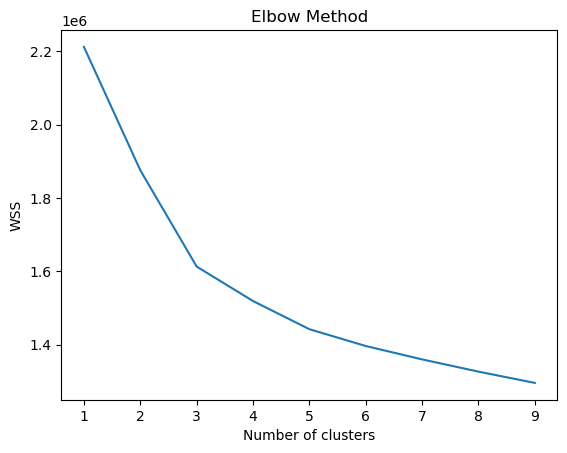

In [16]:
WSS = []
for k in range(1,10,1):
    k_means=KMeans(n_clusters=k, random_state=0,n_init=10)
    k_means.fit(ds)
    WSS.append(k_means.inertia_)

plt.plot(range(1,10,1), WSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [18]:
k_means=KMeans(n_clusters=4, random_state=0,n_init=10)
k_means.fit(ds)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [19]:
centroids=k_means.cluster_centers_
df_centroids=pd.DataFrame(centroids,columns=df.columns)
df_centroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 313 entries, age to d_expected_happy_with_sd_people_b'[7-10]'
dtypes: float64(313)
memory usage: 9.9 KB


In [20]:
df_centroids.head()

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,field_b'psychology and english',field_b'psychology',field_b'social work',field_b'sociology',field_b'speech pathology',field_b'teaching of English',field_b'theory',field_b'working',d_expected_happy_with_sd_people_b'[5-6]',d_expected_happy_with_sd_people_b'[7-10]'
0,26.778626,25.393130,3.874046,2.778626,18.729122,18.356603,21.779160,18.274618,11.112328,11.824351,...,3.816794e-03,1.734723e-18,-4.336809e-19,-5.204170e-18,3.816794e-03,0.000000e+00,-1.084202e-19,0.000000e+00,0.332061,0.438931
1,25.681818,26.579545,3.505682,3.886364,59.607955,6.590909,12.443182,12.823864,3.130682,5.403409,...,1.084202e-19,1.136364e-02,5.681818e-03,5.681818e-03,5.421011e-20,-4.336809e-19,5.421011e-20,-4.336809e-19,0.477273,0.250000
2,25.735736,26.133634,3.617117,3.953453,28.049039,16.280856,21.849505,19.046261,7.051982,7.723949,...,1.501502e-03,1.051051e-02,3.003003e-03,1.651652e-02,1.626303e-19,-3.035766e-18,1.626303e-19,4.504505e-03,0.540541,0.235736
3,26.322581,26.332845,3.626833,3.557185,16.119692,18.431584,20.548218,17.341100,13.400139,14.192471,...,-4.336809e-19,1.466276e-03,7.331378e-04,2.199413e-03,-2.168404e-19,4.398827e-03,7.331378e-04,2.199413e-03,0.524194,0.266129


In [27]:
clusters=k_means.labels_
clusters.shape

(2468,)

Text(0, 0.5, 'Age partner')

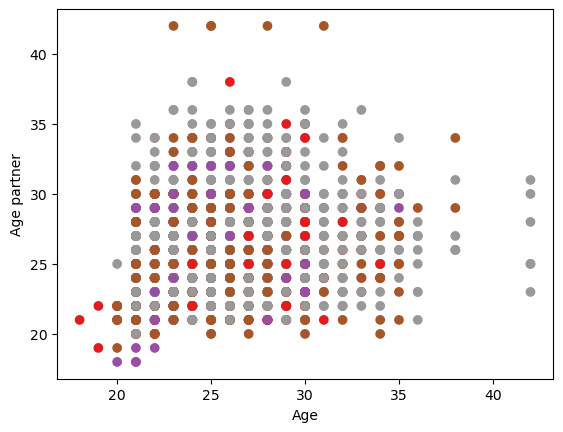

In [22]:
plt.figure()
plt.scatter(ds["age"],ds["age_o"],c=clusters,cmap="Set1")
plt.xlabel("Age")
plt.ylabel("Age partner")

In [24]:
from sklearn.decomposition import PCA

pca=PCA(2)
pca_ds=pca.fit_transform(ds)

In [25]:
pca_ds.shape

(2468, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

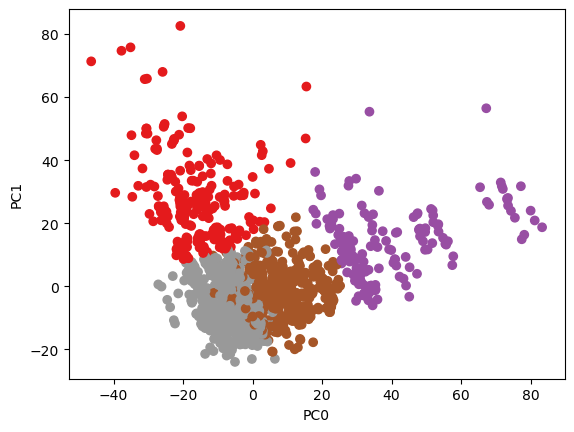

In [31]:
plt.figure()
plt.scatter(x=pca_ds[:,0],y=pca_ds[:,1],c=clusters,cmap="Set1")
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show

In [32]:
silhouette_score(ds,k_means.labels_)

0.1213605025044957

Even though the silhouette_score is low, it increased with the balanced dataset in comparison to the complete dataset

In [33]:
# Revisiting the centroids:
df_centroids.idxmax(axis=1)

0    attractive_important
1       pref_o_attractive
2       pref_o_attractive
3                   age_o
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

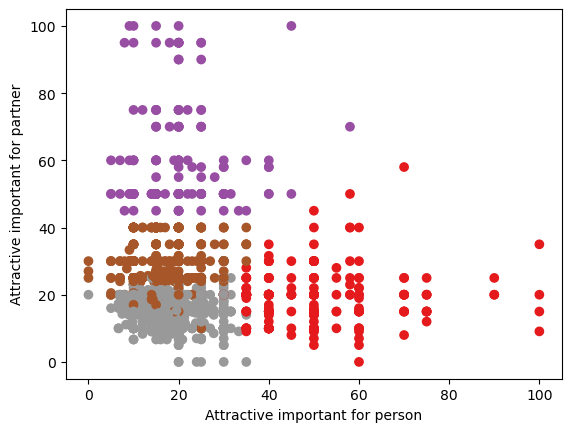

In [34]:
plt.figure()
plt.scatter(x=ds["attractive_important"],y=ds["pref_o_attractive"],c=clusters,cmap="Set1")
plt.xlabel("Attractive important for person")
plt.ylabel("Attractive important for partner")
plt.show

In [35]:
confusion_matrix(yds,k_means.labels_)

array([[133,  83, 330, 688],
       [129,  93, 336, 676],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=int64)